In [1]:
%pip install pandas sqlalchemy pymysql

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
from sqlalchemy import create_engine

In [3]:
engine = create_engine(
    "mysql+pymysql://root@localhost:3306/climate_watch"
)

In [4]:
engine.connect()

In [5]:
city = pd.read_sql(
    "SELECT * FROM globallandtemperaturesbycity",
    engine
)

majorcity = pd.read_sql(
    "SELECT * FROM globallandtemperaturesbymajorcity",
    engine
)
country = pd.read_sql(
    "SELECT * FROM globallandtemperaturesbycountry",
    engine
)
state = pd.read_sql(
    "SELECT * FROM globallandtemperaturesbystate",
    engine
)
globaltemperatures = pd.read_sql(
    "SELECT * FROM globaltemperatures",
    engine
)

In [6]:
city[['AverageTemperature', 'AverageTemperatureUncertainty']].describe()


,AverageTemperature,AverageTemperatureUncertainty
count,8235007.00,8235082.00
mean,16.73,1.03
std,10.35,1.13
min,-42.70,0.03
25%,10.30,0.34
50%,18.83,0.59
75%,25.21,1.35
max,39.65,15.40


In [7]:
majorcity[['AverageTemperature', 'AverageTemperatureUncertainty']].describe()

,AverageTemperature,AverageTemperatureUncertainty
count,456346.00,456350.00
mean,18.13,0.97
std,10.02,0.98
min,-26.77,0.04
25%,12.71,0.34
50%,20.43,0.59
75%,25.92,1.32
max,38.28,14.04


In [8]:
country[['AverageTemperature', 'AverageTemperatureUncertainty']].describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544804.00,545550.00
mean,17.19,1.02
std,10.95,1.20
min,-37.66,0.05
25%,10.03,0.32
50%,20.90,0.57
75%,25.81,1.21
max,38.84,15.00


In [9]:
state[['AverageTemperature', 'AverageTemperatureUncertainty']].describe()

,AverageTemperature,AverageTemperatureUncertainty
count,620012.00,620027.00
mean,8.99,1.29
std,13.77,1.36
min,-45.39,0.04
25%,-0.69,0.32
50%,11.20,0.66
75%,19.90,1.85
max,36.34,12.65


In [10]:
globaltemperatures[['LandAverageTemperature', 'LandAverageTemperatureUncertainty', 'LandMaxTemperature', 'LandMaxTemperatureUncertainty', 'LandMinTemperature', 'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty']].describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.00,3180.00,1992.00,1992.00,1992.00,1992.00,1992.00,1992.00
mean,8.37,0.94,14.35,0.48,2.74,0.43,15.21,0.13
std,4.38,1.10,4.31,0.58,4.16,0.45,1.27,0.07
min,-2.08,0.03,5.90,0.04,-5.41,0.05,12.48,0.04
25%,4.31,0.19,10.21,0.14,-1.33,0.16,14.05,0.06
50%,8.61,0.39,14.76,0.25,2.95,0.28,15.25,0.12
75%,12.55,1.42,18.45,0.54,6.78,0.46,16.40,0.15
max,19.02,7.88,21.32,4.37,9.72,3.50,17.61,0.46


In [11]:
city['Date'] = pd.to_datetime(city['Date'])
city['year'] = city['Date'].dt.year
city['century'] = (city['year'] // 100) + 1
century_stats = city.groupby('century')[['AverageTemperature', 'AverageTemperatureUncertainty']].mean()
print(century_stats)

         AverageTemperature  AverageTemperatureUncertainty
century                                                   
18                    10.12                           3.70
19                    16.03                           1.54
20                    17.73                           0.45
21                    18.55                           0.37


In [12]:
majorcity['Date'] = pd.to_datetime(majorcity['Date'])
majorcity['year'] = majorcity['Date'].dt.year
majorcity['century'] = (majorcity['year'] // 100) + 1
century_stats = majorcity.groupby('century')[['AverageTemperature', 'AverageTemperatureUncertainty']].mean()
print(century_stats)

         AverageTemperature  AverageTemperatureUncertainty
century                                                   
18                    10.70                           3.44
19                    17.54                           1.52
20                    18.91                           0.47
21                    19.73                           0.39


In [13]:
country['Date'] = pd.to_datetime(country['Date'])
country['year'] = country['Date'].dt.year
country['century'] = (country['year'] // 100) + 1
century_stats = country.groupby('century')[['AverageTemperature', 'AverageTemperatureUncertainty']].mean()
print(century_stats)

         AverageTemperature  AverageTemperatureUncertainty
century                                                   
18                     9.05                           4.00
19                    15.76                           1.49
20                    18.74                           0.46
21                    19.52                           0.37


In [14]:
state['Date'] = pd.to_datetime(state['Date'])
state['year'] = state['Date'].dt.year
state['century'] = (state['year'] // 100) + 1
century_stats = state.groupby('century')[['AverageTemperature', 'AverageTemperatureUncertainty']].mean()
print(century_stats)

         AverageTemperature  AverageTemperatureUncertainty
century                                                   
18                     6.29                           3.97
19                     8.51                           1.90
20                     9.64                           0.43
21                    10.67                           0.32


In [15]:
globaltemperatures['Date'] = pd.to_datetime(globaltemperatures['Date'])
globaltemperatures['year'] = globaltemperatures['Date'].dt.year
globaltemperatures['century'] = (globaltemperatures['year'] // 100) + 1
century_stats = globaltemperatures.groupby('century')[['LandAverageTemperature', 'LandAverageTemperatureUncertainty', 'LandMaxTemperature', 'LandMaxTemperatureUncertainty', 'LandMinTemperature', 'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty']].mean()
print(century_stats)

         LandAverageTemperature  LandAverageTemperatureUncertainty  \
century                                                              
18                         8.20                               2.63   
19                         8.01                               1.01   
20                         8.64                               0.18   
21                         9.54                               0.09   

         LandMaxTemperature  LandMaxTemperatureUncertainty  \
century                                                      
18                      NaN                            NaN   
19                    13.96                           1.12   
20                    14.39                           0.22   
21                    15.29                           0.11   

         LandMinTemperature  LandMinTemperatureUncertainty  \
century                                                      
18                      NaN                            NaN   
19                  

In [16]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


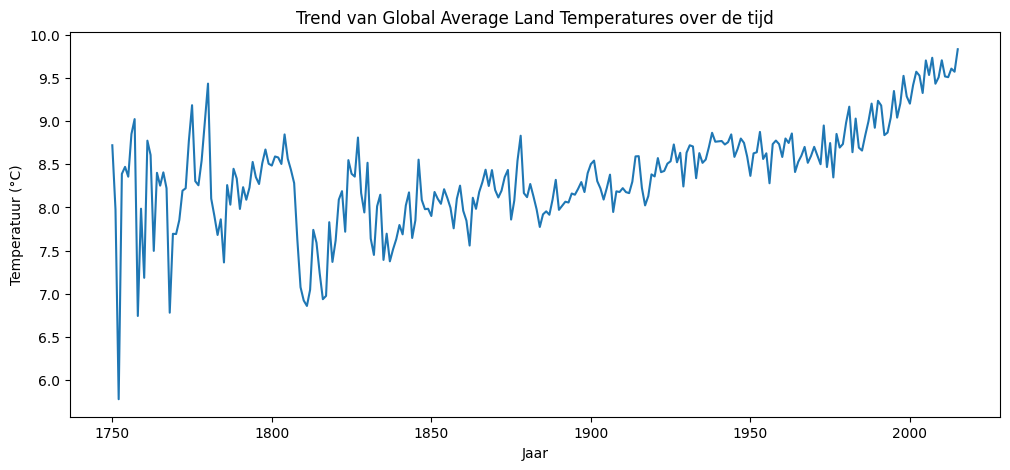

In [17]:
import matplotlib.pyplot as plt

globaltemperature_per_jaar = globaltemperatures.groupby('year')[[
    'LandAverageTemperature'
]].mean()

plt.figure(figsize=(12,5))

plt.plot(globaltemperature_per_jaar.index,
         globaltemperature_per_jaar['LandAverageTemperature'])

plt.title("Trend van Global Average Land Temperatures over de tijd")
plt.xlabel("Jaar")
plt.ylabel("Temperatuur (°C)")

plt.show()

In [18]:
country_21e = country[country['century'] == 21]
mean_per_country = country_21e.groupby('Country')['AverageTemperature'].mean()

print(mean_per_country.sort_values(ascending=False).head(10))

Country
Djibouti\r               29.77
Mali\r                   29.34
United Arab Emirates\r   29.13
Burkina Faso\r           28.94
Senegal\r                28.82
Aruba\r                  28.67
Mauritania\r             28.61
Niger\r                  28.42
Gambia\r                 28.37
Qatar\r                  28.23
Name: AverageTemperature, dtype: float64


In [19]:
print(mean_per_country.sort_values(ascending=True).head(10))

Country
Greenland\r                                   -16.84
Denmark\r                                     -16.32
Svalbard And Jan Mayen\r                       -5.65
Russia\r                                       -3.95
Canada\r                                       -3.52
Mongolia\r                                      0.63
Norway\r                                        1.44
South Georgia And The South Sandwich Isla\r     2.13
Iceland\r                                       2.56
Finland\r                                       2.72
Name: AverageTemperature, dtype: float64


) missing from font(s) DejaVu Sans.ms\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


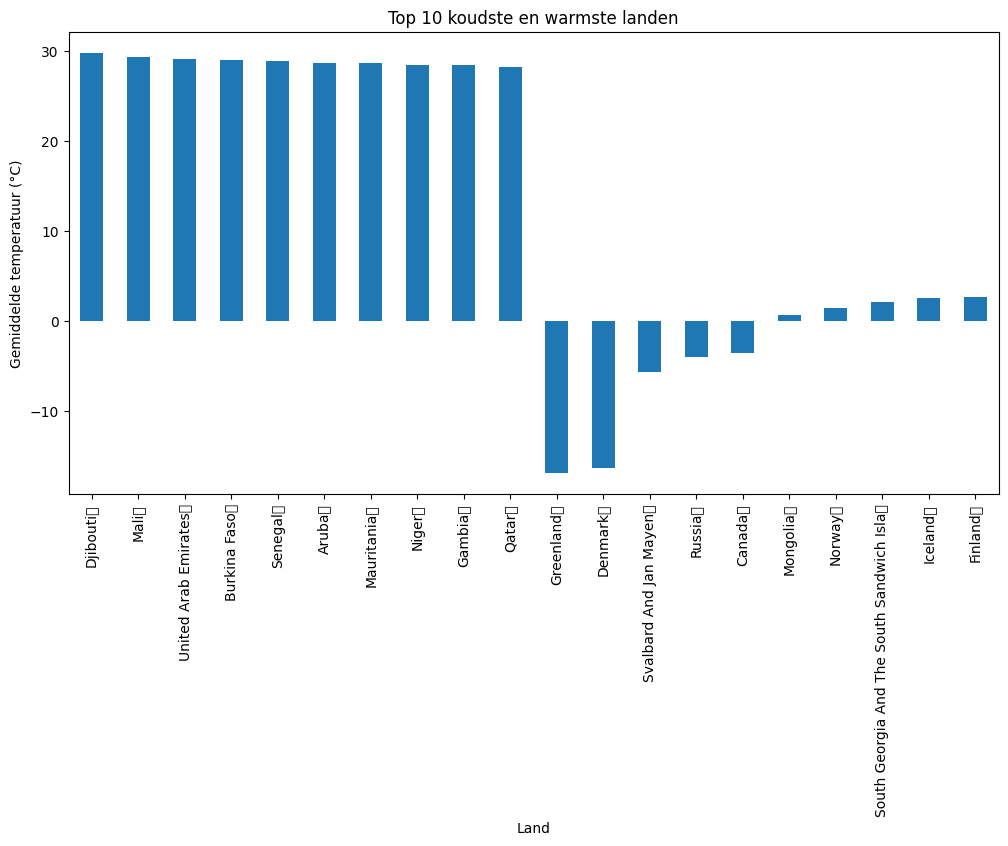

In [20]:
Laagste_10 = mean_per_country.sort_values().head(10)
hoogste_10 = mean_per_country.sort_values(ascending=False).head(10)
Hoog_tegen_laag= pd.concat([hoogste_10, Laagste_10])
plt.figure(figsize=(12,6))
Hoog_tegen_laag.plot(kind='bar')
plt.title("Top 10 koudste en warmste landen")
plt.xlabel("Land")
plt.ylabel("Gemiddelde temperatuur (°C)")
plt.show()

In [21]:
majorcity_21e = majorcity[majorcity['century'] == 21]
majorcity_19e = majorcity[majorcity['century'] == 19]
gemidtemp_21e = majorcity_21e.groupby('City')['AverageTemperature'].mean()
gemidtemp_19e = majorcity_19e.groupby('City')['AverageTemperature'].mean()
verschiltemperatuur = gemidtemp_21e - gemidtemp_19e
gemiddelde_per_jaar = majorcity.groupby(['City', 'year'])['AverageTemperature'].mean().reset_index()
top10_majorcity = verschiltemperatuur.sort_values(ascending=False).head(10)
top10_majorcity = top10_majorcity.index
top10_data = gemiddelde_per_jaar[gemiddelde_per_jaar['City'].isin(top10_majorcity)]


print(top10_data)


          City  year  AverageTemperature
1252   Baghdad  1819               20.13
1253   Baghdad  1820               21.58
1254   Baghdad  1821               22.83
1255   Baghdad  1822               20.87
1256   Baghdad  1823               18.96
...        ...   ...                 ...
19449  Toronto  2009                6.28
19450  Toronto  2010                7.77
19451  Toronto  2011                7.30
19452  Toronto  2012                8.66
19453  Toronto  2013                8.46

[2368 rows x 3 columns]


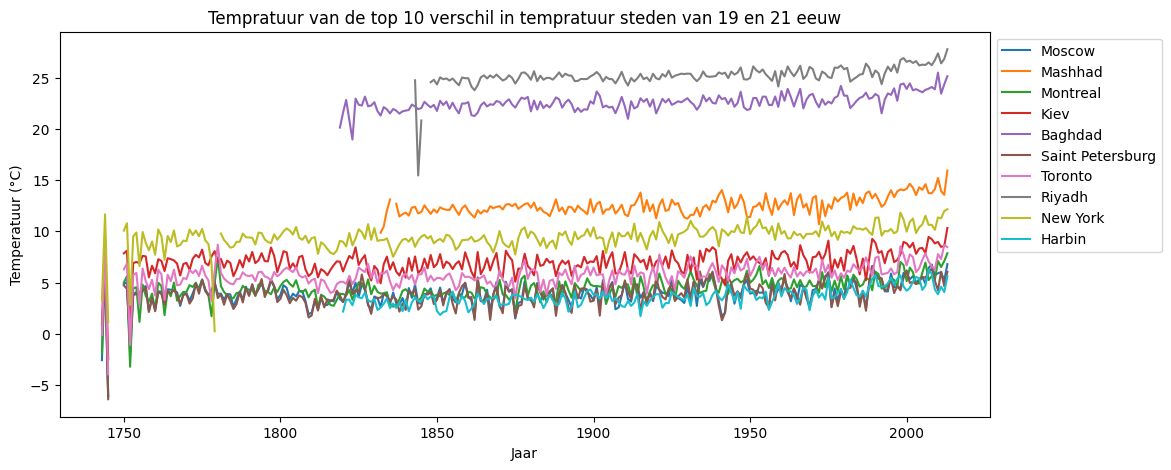

In [22]:
majorcity_21e = majorcity[majorcity['century'] == 21]
majorcity_19e = majorcity[majorcity['century'] == 19]
gemidtemp_21e = majorcity_21e.groupby('City')['AverageTemperature'].mean()
gemidtemp_19e = majorcity_19e.groupby('City')['AverageTemperature'].mean()
verschiltemperatuur = gemidtemp_21e - gemidtemp_19e
gemiddelde_per_jaar = majorcity.groupby(['City', 'year'])['AverageTemperature'].mean().reset_index()
top10_majorcity = verschiltemperatuur.sort_values(ascending=False).head(10).index
top10_data = gemiddelde_per_jaar[gemiddelde_per_jaar['City'].isin(top10_majorcity)]
plt.figure(figsize=(12,5))
for stad in top10_majorcity:
    stad_data = top10_data[top10_data['City'] == stad]
   
    plt.plot(
        stad_data['year'],
        stad_data['AverageTemperature'],
        label=stad
    )
plt.title("Tempratuur van de top 10 verschil in tempratuur steden van 19 en 21 eeuw")
plt.xlabel("Jaar")
plt.ylabel("Temperatuur (°C)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.show()

year
1757   4.03
1755   3.85
1759   3.68
1762   3.52
1754   3.49
1774   3.42
1758   3.36
1756   3.26
1753   3.18
1763   3.15
Name: LandAverageTemperatureUncertainty, dtype: float64


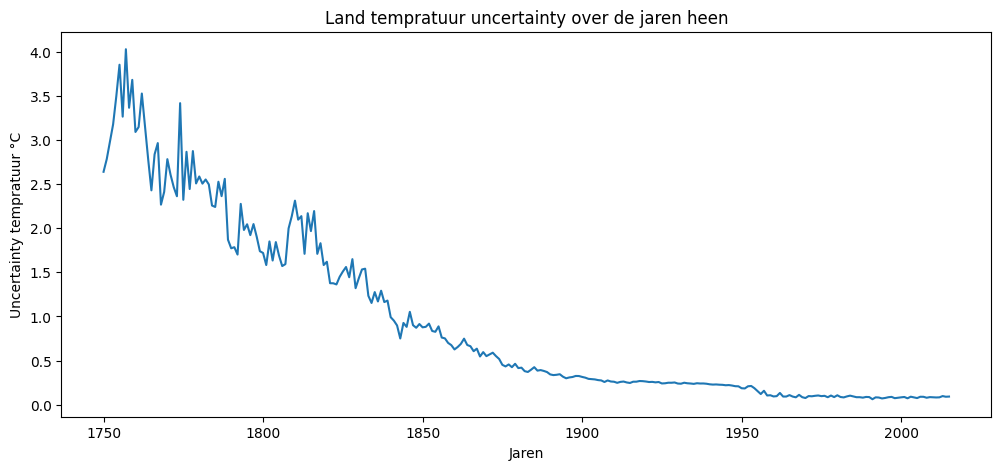

In [23]:
gem_land_uncer = globaltemperatures.groupby('year')['LandAverageTemperatureUncertainty'].mean()
print(gem_land_uncer.sort_values(ascending=False).head(10))

plt.figure(figsize=(12,5))
plt.plot(gem_land_uncer.index, gem_land_uncer.values)
plt.title('Land tempratuur uncertainty over de jaren heen')
plt.xlabel('Jaren')
plt.ylabel('Uncertainty tempratuur °C')
plt.show()


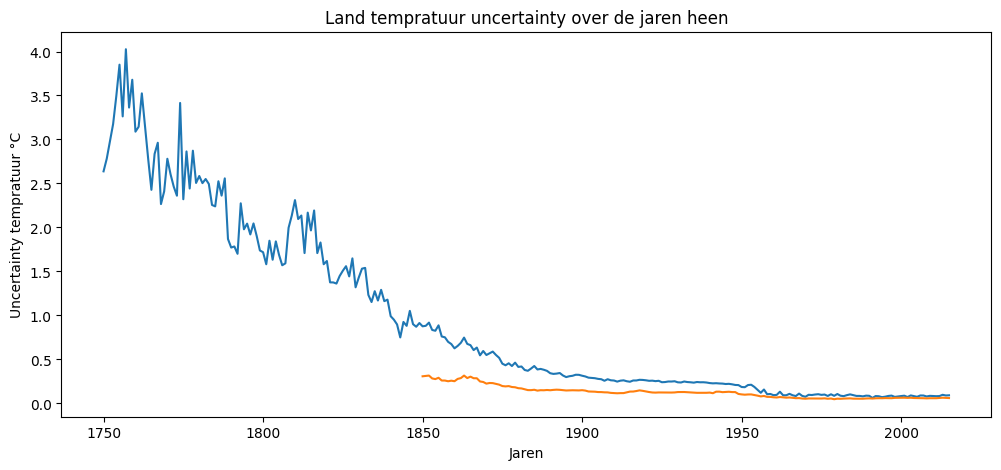

In [24]:
gem_land_and_ocean_uncer = globaltemperatures.groupby('year')['LandAndOceanAverageTemperatureUncertainty'].mean()

plt.figure(figsize=(12,5))
plt.plot(gem_land_uncer.index, gem_land_uncer.values)
plt.plot(gem_land_and_ocean_uncer.index, gem_land_and_ocean_uncer.values)
plt.title('Land tempratuur uncertainty over de jaren heen')
plt.xlabel('Jaren')
plt.ylabel('Uncertainty tempratuur °C')
plt.show()


In [25]:
country_21e = country[country['century'] == 21]
country_19e = country[country['century'] == 19]
country_gemidtemp_21e = country_21e.groupby('Country')['AverageTemperature'].mean()
country_gemidtemp_19e = country_19e.groupby('Country')['AverageTemperature'].mean()
country_verschiltemperatuur = country_gemidtemp_21e - country_gemidtemp_19e
print(country_verschiltemperatuur.sort_values(ascending= True).head(10))
print(country_verschiltemperatuur.sort_values(ascending= False).head(10))

Country
Timor Leste\r   0.87
Australia\r     0.89
Oceania\r       0.90
Bahamas\r       0.93
Bolivia\r       0.94
Cuba\r          0.99
New Zealand\r   0.99
Botswana\r      1.00
Macau\r         1.01
Zimbabwe\r      1.01
Name: AverageTemperature, dtype: float64
Country
Greenland\r                2.34
Denmark\r                  2.32
Canada\r                   2.30
Svalbard And Jan Mayen\r   2.25
Turkmenistan\r             2.12
Uzbekistan\r               2.10
Kazakhstan\r               2.08
Russia\r                   2.04
Azerbaijan\r               1.99
Iran\r                     1.96
Name: AverageTemperature, dtype: float64


In [26]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import plotly.express as px 

country_verschiltemperatuur.columns = ['Country', 'Temperature_verandering'] 
fig = px.choropleth( 
    country_verschiltemperatuur, 
    locations='Country', 
    locationmode='country names',
    color='Temperature_verandering', 
    title='Verandering in gemiddelde temperatuur per land (21e vs 19e eeuw)' ) 
fig.show()


C:\Users\rafsc\AppData\Local\Temp\ipykernel_14752\2734799833.py:4: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(


ValueError: Value of 'locations' is not the name of a column in 'data_frame'. Expected one of ['AverageTemperature'] but received: Country

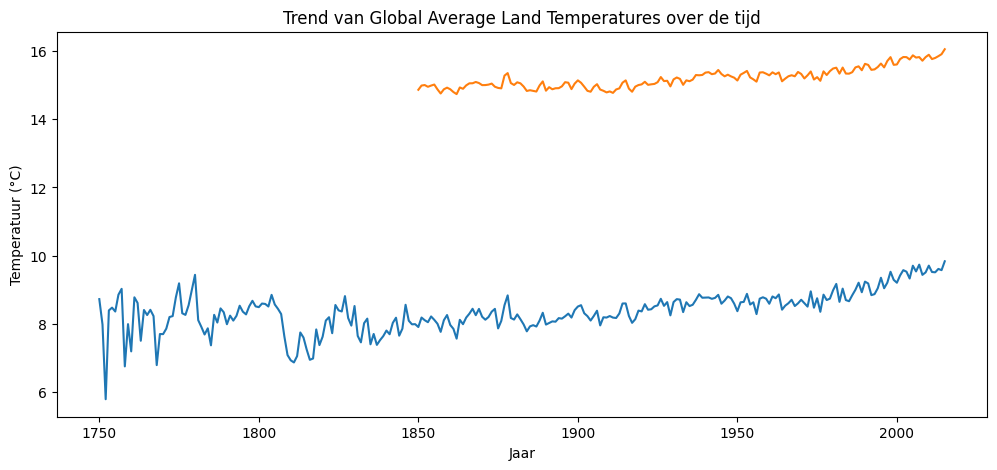

In [28]:
globaltemperature_per_jaar = globaltemperatures.groupby('year')[[
    'LandAverageTemperature'
]].mean()
globaltemperatureLandO_per_jaar = globaltemperatures.groupby('year')[[
    'LandAndOceanAverageTemperature'
]].mean()



plt.figure(figsize=(12,5))

plt.plot(globaltemperature_per_jaar.index,
         globaltemperature_per_jaar['LandAverageTemperature'])
plt.plot(globaltemperatureLandO_per_jaar.index,
         globaltemperatureLandO_per_jaar['LandAndOceanAverageTemperature'])

plt.title("Trend van Global Average Land Temperatures over de tijd")
plt.xlabel("Jaar")
plt.ylabel("Temperatuur (°C)")

plt.show()

In [29]:
globaltemperature_per_jaar.to_csv("avg_land_temp_per_year.csv")
globaltemperatureLandO_per_jaar.to_csv("avg_land_ocean_temp_per_year.csv")

In [30]:

Laagste_10.to_csv("laagste10.csv")
hoogste_10.to_csv("hoogste_10.csv")

In [31]:
gemiddelde_per_jaarc = country.groupby(['Country', 'year'])['AverageTemperature'].mean()
print(gemiddelde_per_jaarc.head(10))
gemiddelde_per_jaarc.to_csv("Landengemiddeldeperjaar.csv")

Country        year
Afghanistan\r  1838   18.38
               1839     NaN
               1840   13.41
               1841   14.00
               1842   15.15
               1843   13.76
               1844   13.15
               1845   13.31
               1846   14.03
               1847   13.48
Name: AverageTemperature, dtype: float64


In [32]:
top10_data.to_csv("top10steden.csv")
top10_majorcity.to_csv("datatop10steden.csv")

AttributeError: 'Index' object has no attribute 'to_csv'

In [34]:
top10_data.to_csv("top10steden.csv")
top10_majorcity = verschiltemperatuur.sort_values(ascending=False).head(10)
top10_majorcity.to_csv("datatop10steden.csv")

In [35]:
gem_land_and_ocean_uncer.to_csv("Uncerlandenzee.csv")
gem_land_uncer.to_csv("landuncer.csv")

In [37]:
gemidtemp_21e.to_csv("gemiddeldetemperatuurstad.csv")

Country
Heard Island And Mcdonald Islands\r     0.45
French Southern And Antarctic Lands\r   0.52
Macau\r                                 0.57
Hong Kong\r                             0.58
Timor Leste\r                           0.59
Northern Mariana Islands\r              0.59
Guam\r                                  0.59
Congo\r                                 0.60
Gabon\r                                 0.61
Papua New Guinea\r                      0.61
Kazakhstan\r                            1.45
Canada\r                                1.43
Mongolia\r                              1.41
Turkmenistan\r                          1.41
Uzbekistan\r                            1.39
Russia\r                                1.35
Kyrgyzstan\r                            1.24
Azerbaijan\r                            1.22
Tajikistan\r                            1.20
Iran\r                                  1.19
Name: AverageTemperature, dtype: float64


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

) missing from font(s) DejaVu Sans.ms\Python\Python314\Lib\site-packages\IPython\core\events.py:96: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from font(s) DejaVu Sans.ms\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


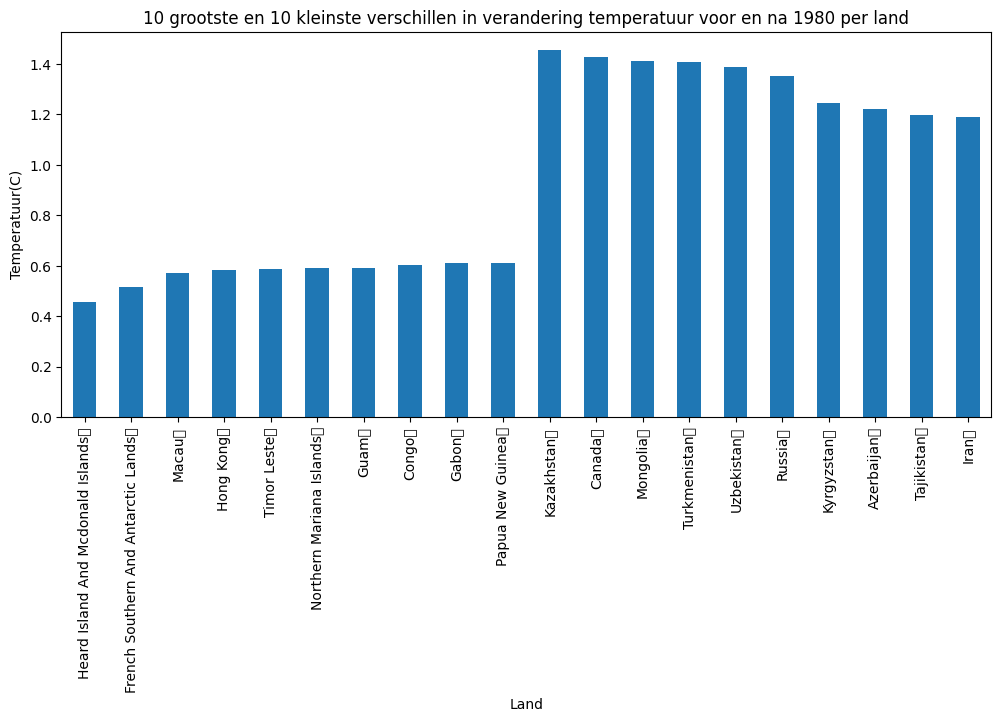

In [38]:
countryvanaf1980 = country[country['year'] >= 1980]
gemidperjaarvanaf1980 = countryvanaf1980.groupby(['Country','year'])['AverageTemperature'].mean()
countryvoor1980 = country[country['year'] <= 1979]
gemidperjaarvoor1980 = countryvoor1980.groupby(['Country', 'year'])['AverageTemperature'].mean()
gemiddeldvoor1980 = countryvoor1980.groupby('Country')['AverageTemperature'].mean()
gemiddeldna1980 = countryvanaf1980.groupby('Country')['AverageTemperature'].mean()
verschillandtemp = gemiddeldna1980 - gemiddeldvoor1980
kleinsteverschiltemp = verschillandtemp.sort_values(ascending= False).head(10)
grootsteverschiltemp = verschillandtemp.sort_values(ascending= True).head(10)
Verschiltempdata = pd.concat([grootsteverschiltemp, kleinsteverschiltemp])
print(Verschiltempdata)

plt.figure(figsize=(12,5))
Verschiltempdata.plot (kind= 'bar')
plt.title('10 grootste en 10 kleinste verschillen in verandering temperatuur voor en na 1980 per land')
plt.xlabel('Land')
plt.ylabel('Temperatuur(C)')
plt.plot 

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

) missing from font(s) DejaVu Sans.ms\Python\Python314\Lib\site-packages\IPython\core\events.py:96: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from font(s) DejaVu Sans.ms\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


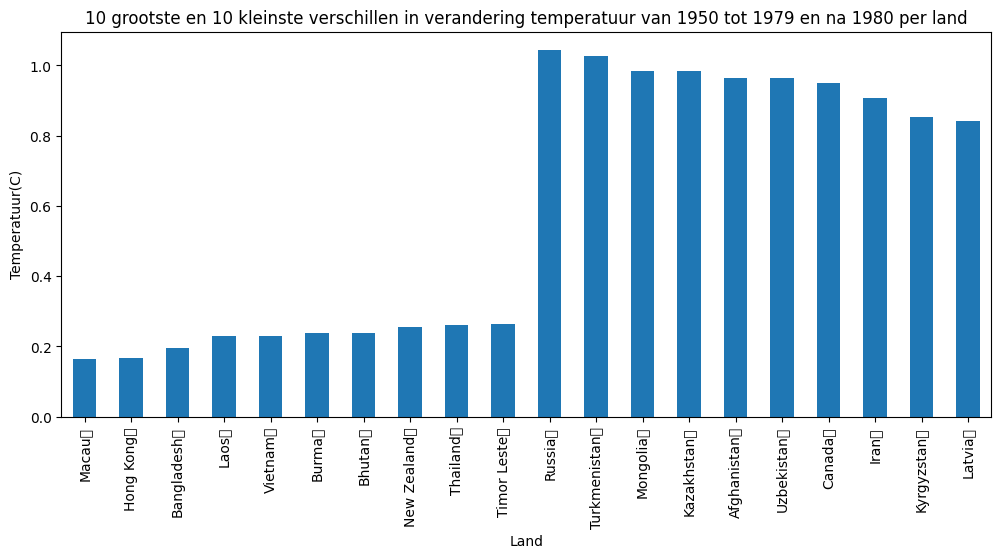

In [39]:
temperatuurtussen19501979 = country[(country['year'] >= 1950) & (country['year'] <= 1979)]
gemidperjaartussen19501980 = temperatuurtussen19501979.groupby(['Country', 'year'])['AverageTemperature'].mean()
gemiddeld19501980 = temperatuurtussen19501979.groupby('Country')['AverageTemperature'].mean()
verschil19501980enna1980 = gemiddeldna1980 - gemiddeld19501980
klein = verschil19501980enna1980.sort_values(ascending= False).head(10)
groot = verschil19501980enna1980.sort_values(ascending= True).head(10)
verschillen = pd.concat([groot, klein])
plt.figure(figsize=(12,5))
verschillen.plot (kind= 'bar')
plt.title('10 grootste en 10 kleinste verschillen in verandering temperatuur van 1950 tot 1979 en na 1980 per land')
plt.xlabel('Land')
plt.ylabel('Temperatuur(C)')
plt.plot 


In [40]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import pandas as pd

df = pd.read_excel(r"C:\\xampp\\htdocs\\Nieuwe data-science\\climate-watch\\Data_CO2.xlsx")

In [42]:
df.head()
df.columns
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Substance           210 non-null    str    
 1   EDGAR Country Code  210 non-null    str    
 2   Country             210 non-null    str    
 3   1970                210 non-null    float64
 4   1971                210 non-null    float64
 5   1972                210 non-null    float64
 6   1973                210 non-null    float64
 7   1974                210 non-null    float64
 8   1975                210 non-null    float64
 9   1976                210 non-null    float64
 10  1977                210 non-null    float64
 11  1978                210 non-null    float64
 12  1979                210 non-null    float64
 13  1980                210 non-null    float64
 14  1981                210 non-null    float64
 15  1982                210 non-null    float64
 16  1983               

In [43]:
jaar_kolommen = [col for col in df.columns if isinstance(col, int)]

In [44]:
CO2_long = df.melt(
    id_vars=['Country'],
    value_vars=jaar_kolommen,
    var_name='Year',
    value_name='CO2'
)

CO2_long.head()

,Country,Year,CO2
0,Aruba,1970,0.03
1,Afghanistan,1970,1.73
2,Angola,1970,8.93
3,Anguilla,1970,0.00
4,International Aviation,1970,169.90


In [45]:
CO2_long.to_csv("DataCO2.csv")

In [46]:
import pandas as pd

population = pd.read_excel(r"C:\\xampp\\htdocs\\Nieuwe data-science\\climate-watch\\population.xlsx")

In [47]:
population.head
population.columns


Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'],
      dtype='str')

In [48]:
jaar_kolommen =  [col for col in population.columns if col.isdigit()]

In [49]:
population_long = population.melt(
    id_vars=['Country Name'],
    value_vars=jaar_kolommen,
    var_name='Year',
    value_name='Population'
)


print(population_long.head(5))


                  Country Name  Year   Population
0                        Aruba  1960     54922.00
1  Africa Eastern and Southern  1960 130075728.00
2                  Afghanistan  1960   9035043.00
3   Africa Western and Central  1960  97630925.00
4                       Angola  1960   5231654.00


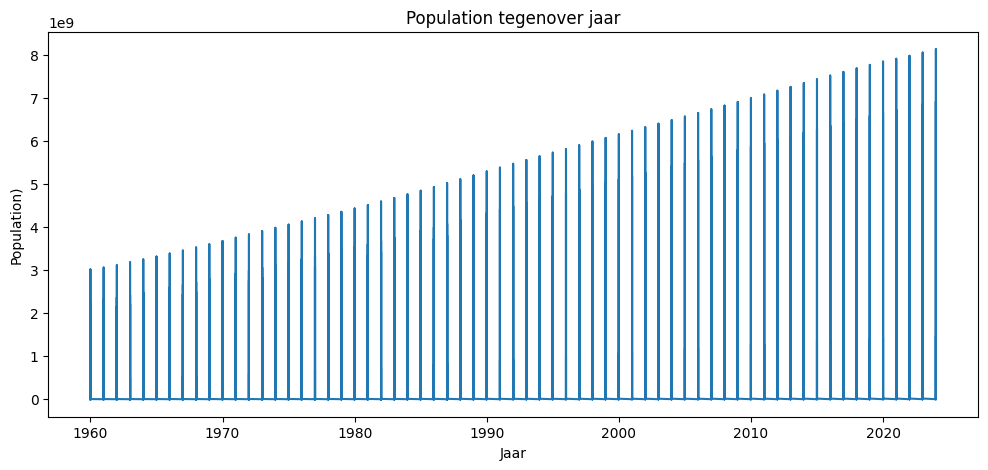

In [50]:
population_long['Year'] = population_long['Year'].astype(int)
plt.figure(figsize=(12,5))

plt.plot(population_long['Year'], 
         population_long['Population'])


plt.title("Population tegenover jaar")
plt.xlabel("Jaar")
plt.ylabel("Population)")

plt.show()

In [51]:
print(CO2_long.head())
print(population_long.head())

                  Country  Year    CO2
0                   Aruba  1970   0.03
1             Afghanistan  1970   1.73
2                  Angola  1970   8.93
3                Anguilla  1970   0.00
4  International Aviation  1970 169.90
                  Country Name  Year   Population
0                        Aruba  1960     54922.00
1  Africa Eastern and Southern  1960 130075728.00
2                  Afghanistan  1960   9035043.00
3   Africa Western and Central  1960  97630925.00
4                       Angola  1960   5231654.00


In [52]:
population_long = population_long.rename(columns={
    'Country Name': 'Country'
})
print(population_long.head())

                       Country  Year   Population
0                        Aruba  1960     54922.00
1  Africa Eastern and Southern  1960 130075728.00
2                  Afghanistan  1960   9035043.00
3   Africa Western and Central  1960  97630925.00
4                       Angola  1960   5231654.00


In [53]:
CO2_population = pd.merge(
    CO2_long,
    population_long,
    on=['Country', 'Year'],
    how='inner'
)
print(CO2_population.head(10))

                Country  Year    CO2  Population
0                 Aruba  1970   0.03    58950.00
1           Afghanistan  1970   1.73 11290128.00
2                Angola  1970   8.93  5852788.00
3               Albania  1970   4.85  2135479.00
4  United Arab Emirates  1970  19.46   286536.00
5             Argentina  1970  87.62 23878327.00
6               Armenia  1970  10.09  2475633.00
7   Antigua and Barbuda  1970   0.10    64528.00
8             Australia  1970 160.69 12507000.00
9               Austria  1970  53.00  7467086.00


In [54]:
CO2_population['CO2/percapita'] = CO2_population["CO2"]*1000000/CO2_population['Population'] #de keer miljoen is voor co2 omzetten van Mton naar ton
print(CO2_population.sort_values('CO2/percapita', ascending=False).head(10))

     Country  Year  CO2  Population  CO2/percapita
6880   Palau  2012 3.60    17765.00         202.87
3982   Palau  1994 3.00    16770.00         178.64
118    Palau  1970 1.99    11368.00         175.48
2372   Palau  1984 2.31    13337.00         173.07
279    Palau  1971 1.99    11759.00         169.64
440    Palau  1972 1.99    12194.00         163.59
1889   Palau  1981 2.02    12402.00         163.27
1728   Palau  1980 1.99    12271.00         162.56
1567   Palau  1979 1.99    12337.00         161.69
2211   Palau  1983 2.09    13006.00         160.47


In [55]:
country.head
country.columns

Index(['Date', 'AverageTemperature', 'AverageTemperatureUncertainty',
       'Country', 'year', 'century'],
      dtype='str')

In [56]:
country_perjaar = country.groupby(['year', 'Country'])['AverageTemperature'].mean().reset_index()
print(country_perjaar.head(10))


   year                   Country  AverageTemperature
0  1743                 Albania\r                8.62
1  1743                 Andorra\r                7.56
2  1743                 Austria\r                2.48
3  1743                 Belarus\r                0.77
4  1743                 Belgium\r                7.11
5  1743  Bosnia And Herzegovina\r                6.39
6  1743                Bulgaria\r                5.93
7  1743                 Croatia\r                7.22
8  1743          Czech Republic\r                4.17
9  1743        Denmark (Europe)\r                6.51


In [57]:
country_perjaar = country_perjaar.rename(columns={
    'year' : 'Year'
    })
country_perjaar.head
country_perjaar.columns

Index(['Year', 'Country', 'AverageTemperature'], dtype='str')

In [58]:
country_perjaar['Country'] = country_perjaar['Country'].str.replace('\r', '')

In [59]:
Tempretuur_CO2percapita = pd.merge(
    CO2_population,
    country_perjaar,
    on=['Country', 'Year'],
    how='inner'
)


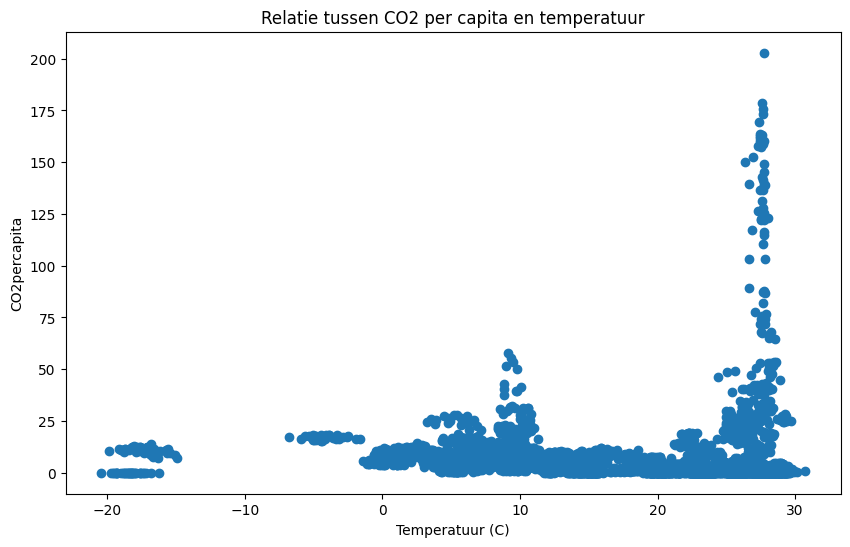

In [60]:
plt.figure(figsize=(10,6))

plt.scatter(Tempretuur_CO2percapita['AverageTemperature']
     ,Tempretuur_CO2percapita['CO2/percapita'])

plt.title('Relatie tussen CO2 per capita en temperatuur')
plt.xlabel('Temperatuur (C)')
plt.ylabel('CO2percapita')

plt.show()

In [61]:
print(Tempretuur_CO2percapita.sort_values('CO2/percapita', ascending= False))

      Country  Year  CO2  Population  CO2/percapita  AverageTemperature
6241    Palau  2012 3.60    17765.00         202.87               27.72
3613    Palau  1994 3.00    16770.00         178.64               27.62
109     Palau  1970 1.99    11368.00         175.48               27.63
2153    Palau  1984 2.31    13337.00         173.07               27.64
255     Palau  1971 1.99    11759.00         169.64               27.37
...       ...   ...  ...         ...            ...                 ...
448   Burundi  1973 0.06  3611991.00           0.02               20.33
10    Burundi  1970 0.06  3530432.00           0.02               20.05
156   Burundi  1971 0.06  3617289.00           0.02               19.66
302   Burundi  1972 0.06  3617128.00           0.02               20.26
1762  Burundi  1982 0.07  4681390.00           0.02               20.37

[6424 rows x 6 columns]


In [62]:
correlatie = Tempretuur_CO2percapita['CO2/percapita'].corr(
    Tempretuur_CO2percapita['AverageTemperature']
)

print(correlatie)

-0.07123535246255695


In [66]:
wereldCO2 = Tempretuur_CO2percapita.groupby('Year')['CO2'].sum().reset_index()
wereldCO2 = wereldCO2.rename(columns={'CO2': 'Total_CO2'})
print(wereldCO2.head())

   Year  Total_CO2
0  1970   12148.07
1  1971   12041.56
2  1972   12653.83
3  1973   13375.83
4  1974   13269.39


In [64]:
print(globaltemperature_per_jaar)

      LandAverageTemperature
year                        
1750                    8.72
1751                    7.98
1752                    5.78
1753                    8.39
1754                    8.47
...                      ...
2011                    9.52
2012                    9.51
2013                    9.61
2014                    9.57
2015                    9.83

[266 rows x 1 columns]


In [65]:
globaltemperature_per_jaar.head
globaltemperature_per_jaar.columns

Index(['LandAverageTemperature'], dtype='str')

In [68]:
globaltemperature_per_jaar = globaltemperatures.groupby('year')[['LandAverageTemperature']].mean().reset_index()
globaltemperature_per_jaar = globaltemperature_per_jaar.rename(columns={'year':'Year'})
print(globaltemperature_per_jaar)

     Year  LandAverageTemperature
0    1750                    8.72
1    1751                    7.98
2    1752                    5.78
3    1753                    8.39
4    1754                    8.47
..    ...                     ...
261  2011                    9.52
262  2012                    9.51
263  2013                    9.61
264  2014                    9.57
265  2015                    9.83

[266 rows x 2 columns]


In [69]:
Tempretuur_CO2wereld = pd.merge(
    wereldCO2,
    globaltemperature_per_jaar,
    on=['Year'],
    how='inner'
)
print(Tempretuur_CO2wereld)


    Year  Total_CO2  LandAverageTemperature
0   1970   12148.07                    8.70
1   1971   12041.56                    8.60
2   1972   12653.83                    8.50
3   1973   13375.83                    8.95
4   1974   13269.39                    8.47
5   1975   13175.98                    8.74
6   1976   13927.01                    8.35
7   1977   14401.23                    8.85
8   1978   14829.62                    8.69
9   1979   15254.94                    8.73
10  1980   14961.65                    8.98
11  1981   14667.11                    9.17
12  1982   14404.90                    8.64
13  1983   14486.34                    9.03
14  1984   15026.77                    8.69
15  1985   15203.38                    8.66
16  1986   15427.21                    8.83
17  1987   15958.28                    8.99
18  1988   16574.78                    9.20
19  1989   16833.63                    8.92
20  1990   16877.75                    9.23
21  1991   16983.66             

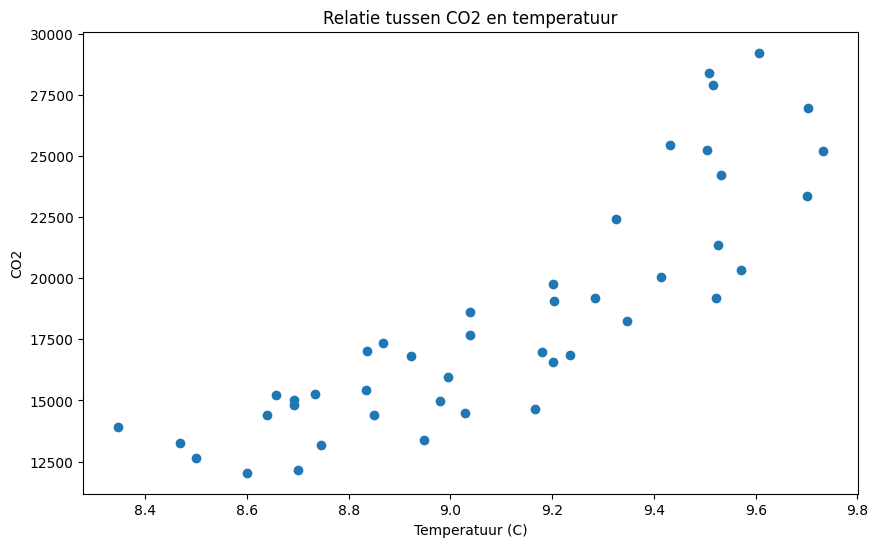

In [81]:
plt.figure(figsize=(10,6))

plt.scatter(Tempretuur_CO2wereld['LandAverageTemperature'],
            Tempretuur_CO2wereld['Total_CO2'])

plt.title('Relatie tussen CO2 en temperatuur')
plt.xlabel('Temperatuur (C)')
plt.ylabel('CO2')

plt.show()

In [75]:
correlatie2 = Tempretuur_CO2wereld['LandAverageTemperature'].corr(
    Tempretuur_CO2wereld['Total_CO2']
)

print(correlatie2)

0.8566518487221282


In [76]:
print(population_long)

                           Country  Year   Population
0                            Aruba  1960     54922.00
1      Africa Eastern and Southern  1960 130075728.00
2                      Afghanistan  1960   9035043.00
3       Africa Western and Central  1960  97630925.00
4                           Angola  1960   5231654.00
...                            ...   ...          ...
17285                       Kosovo  2024   1594353.00
17286                  Yemen, Rep.  2024  40583164.00
17287                 South Africa  2024  64007187.00
17288                       Zambia  2024  21314956.00
17289                     Zimbabwe  2024  16634373.00

[17290 rows x 3 columns]


In [125]:
wereld_population_per_jaar = population_long.groupby('Year')[['Population']].sum().reset_index()


print(wereld_population_per_jaar)

    Year     Population
0   1960 30465219132.00
1   1961 30888834408.00
2   1962 31459270195.00
3   1963 32164186618.00
4   1964 32875415370.00
..   ...            ...
60  2020 84475839687.00
61  2021 85312783058.00
62  2022 86148674478.00
63  2023 87025416270.00
64  2024 87945905636.00

[65 rows x 2 columns]


In [126]:
Tempretuur_population = pd.merge(
    wereld_population_per_jaar,
    globaltemperature_per_jaar,
    on=['Year'],
    how='inner'
)
print(Tempretuur_population)


    Year     Population  LandAverageTemperature
0   1960 30465219132.00                    8.58
1   1961 30888834408.00                    8.80
2   1962 31459270195.00                    8.75
3   1963 32164186618.00                    8.86
4   1964 32875415370.00                    8.41
5   1965 33595022236.00                    8.53
6   1966 34346225028.00                    8.60
7   1967 35099452803.00                    8.70
8   1968 35872456005.00                    8.52
9   1969 36671398888.00                    8.60
10  1970 37487074426.00                    8.70
11  1971 38319753237.00                    8.60
12  1972 39137364580.00                    8.50
13  1973 39967225895.00                    8.95
14  1974 40794858505.00                    8.47
15  1975 41607913238.00                    8.74
16  1976 42411317716.00                    8.35
17  1977 43210067600.00                    8.85
18  1978 44025780436.00                    8.69
19  1979 44866241359.00                 

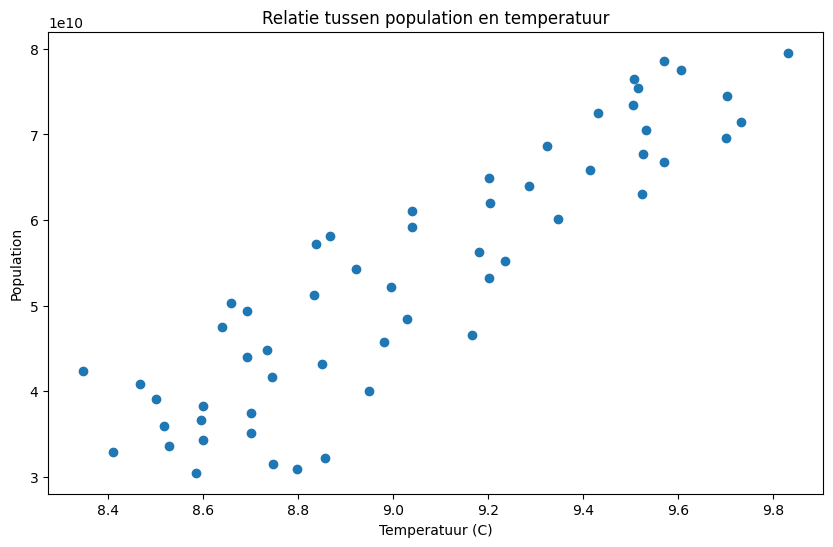

In [127]:
plt.figure(figsize=(10,6))

plt.scatter(Tempretuur_population['LandAverageTemperature'],
            Tempretuur_population['Population'])

plt.title('Relatie tussen population en temperatuur')
plt.xlabel('Temperatuur (C)')
plt.ylabel('Population')

plt.show()

In [128]:
correlatie3 = Tempretuur_population['LandAverageTemperature'].corr(
    Tempretuur_population['Population']
)

print(correlatie3)

0.8991279537938661


In [90]:
GDP = pd.read_excel(r"C:\\xampp\\htdocs\\Nieuwe data-science\\climate-watch\\GDP.xlsx")

In [91]:
print(GDP.head(10))

                       Country   1960   1961   1962   1963    1964    1965  \
0                        Aruba    NaN    NaN    NaN    NaN     NaN     NaN   
1  Africa Eastern and Southern 186.09 186.91 197.37 225.40  208.96  226.84   
2                  Afghanistan    NaN    NaN    NaN    NaN     NaN     NaN   
3   Africa Western and Central 121.94 127.45 133.82 139.00  148.55  155.56   
4                       Angola    NaN    NaN    NaN    NaN     NaN     NaN   
5                      Albania    NaN    NaN    NaN    NaN     NaN     NaN   
6                      Andorra    NaN    NaN    NaN    NaN     NaN     NaN   
7                   Arab World    NaN 212.90 210.82 225.82  243.91  256.20   
8         United Arab Emirates    NaN    NaN    NaN    NaN     NaN     NaN   
9                    Argentina 778.25 971.34 870.22 852.97 1176.20 1281.83   

     1966    1967    1968  ...     2015     2016     2017     2018     2019  \
0     NaN     NaN     NaN  ... 27458.22 27441.55 28440.04 3008

In [92]:
jaar_kolommen =  [col for col in population.columns if col.isdigit()]

In [95]:
GDP_Long = GDP.melt(
    id_vars=['Country'],
    value_vars=jaar_kolommen,
    var_name='Year',
    value_name='GDP'
)

GDP_Long.head()

,Country,Year,GDP
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,186.09
2,Afghanistan,1960,NaN
3,Africa Western and Central,1960,121.94
4,Angola,1960,NaN


In [97]:
print(country_perjaar)

       Year         Country  AverageTemperature
0      1743         Albania                8.62
1      1743         Andorra                7.56
2      1743         Austria                2.48
3      1743         Belarus                0.77
4      1743         Belgium                7.11
...     ...             ...                 ...
48238  2013  Western Sahara               23.74
48239  2013           Yemen               28.13
48240  2013          Zambia               21.20
48241  2013        Zimbabwe               20.71
48242  2013           Åland                6.23

[48243 rows x 3 columns]


In [104]:
GDP_Long['Year'] = GDP_Long['Year'].astype(int)

In [106]:
Tempretuur_GDP = pd.merge(
    GDP_Long,
    country_perjaar,
    on=['Country', 'Year'],
    how='inner'
)
print(Tempretuur_GDP)

                     Country  Year     GDP  AverageTemperature
0                      Aruba  1960     NaN               28.25
1                Afghanistan  1960     NaN               13.99
2                     Angola  1960     NaN               21.93
3                    Albania  1960     NaN               13.34
4                    Andorra  1960     NaN               11.21
...                      ...   ...     ...                 ...
8797  British Virgin Islands  2013     NaN               27.31
8798                   Samoa  2013 4023.53               27.18
8799            South Africa  2013 7331.65               17.33
8800                  Zambia  2013 1820.72               21.20
8801                Zimbabwe  2013 1362.99               20.71

[8802 rows x 4 columns]


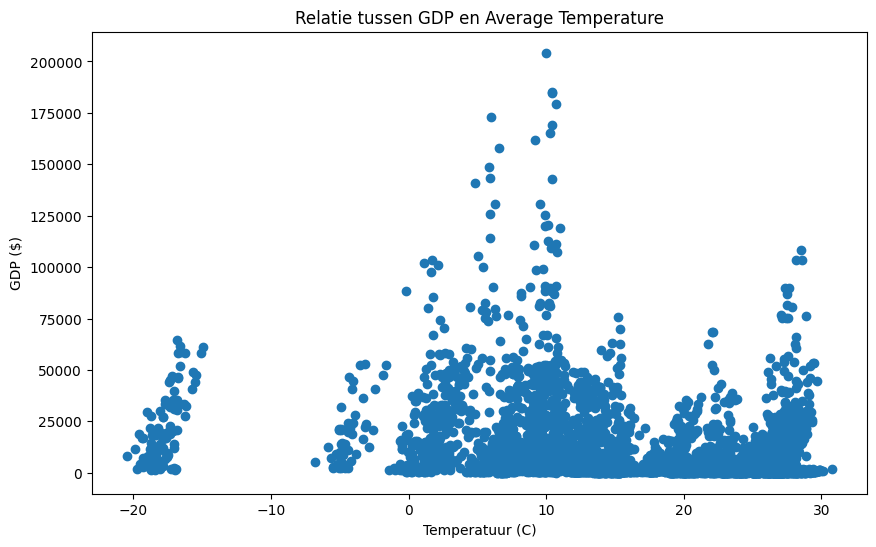

In [110]:
plt.figure(figsize=(10,6))

plt.scatter(Tempretuur_GDP['AverageTemperature'],
            Tempretuur_GDP['GDP'])

plt.title('Relatie tussen GDP en Average Temperature')
plt.xlabel('Temperatuur (C)')
plt.ylabel('GDP ($)')

plt.show()

In [112]:
correlatie4 = Tempretuur_GDP['AverageTemperature'].corr(
    Tempretuur_GDP['GDP']
)

print(correlatie4)

-0.34359529309351067


In [114]:
energieverbruik = pd.read_csv(r"C:\\xampp\\htdocs\\Nieuwe data-science\\climate-watch\\Energieverbruik.csv")

In [115]:
print(energieverbruik.head(10))

        Entity Code  Year  Primary energy consumption
0  Afghanistan  AFG  1980                        6.34
1  Afghanistan  AFG  1981                        7.29
2  Afghanistan  AFG  1982                        7.89
3  Afghanistan  AFG  1983                        9.88
4  Afghanistan  AFG  1984                        9.93
5  Afghanistan  AFG  1985                        9.63
6  Afghanistan  AFG  1986                        9.99
7  Afghanistan  AFG  1987                       16.93
8  Afghanistan  AFG  1988                       31.09
9  Afghanistan  AFG  1989                       30.51


In [116]:
energieverbruik = energieverbruik.rename(columns={
    'Entity': 'Country'
})
print(energieverbruik.head())

       Country Code  Year  Primary energy consumption
0  Afghanistan  AFG  1980                        6.34
1  Afghanistan  AFG  1981                        7.29
2  Afghanistan  AFG  1982                        7.89
3  Afghanistan  AFG  1983                        9.88
4  Afghanistan  AFG  1984                        9.93


In [117]:
Tempretuur_energieverbruik = pd.merge(
    energieverbruik,
    country_perjaar,
    on=['Country', 'Year'],
    how='inner'
)
print(Tempretuur_energieverbruik)

          Country Code  Year  Primary energy consumption  AverageTemperature
0     Afghanistan  AFG  1980                        6.34               14.89
1     Afghanistan  AFG  1981                        7.29               14.86
2     Afghanistan  AFG  1982                        7.89               13.73
3     Afghanistan  AFG  1983                        9.88               14.61
4     Afghanistan  AFG  1984                        9.93               14.25
...           ...  ...   ...                         ...                 ...
7395     Zimbabwe  ZWE  2009                       31.27               21.38
7396     Zimbabwe  ZWE  2010                       35.44               21.99
7397     Zimbabwe  ZWE  2011                       40.72               21.60
7398     Zimbabwe  ZWE  2012                       44.85               21.52
7399     Zimbabwe  ZWE  2013                       46.43               20.71

[7400 rows x 5 columns]


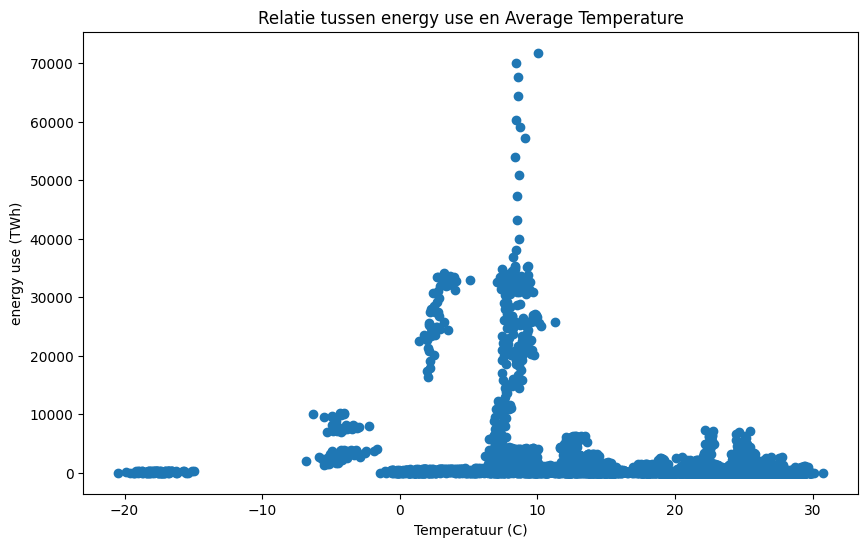

In [119]:
plt.figure(figsize=(10,6))

plt.scatter(Tempretuur_energieverbruik['AverageTemperature'],
            Tempretuur_energieverbruik['Primary energy consumption'])

plt.title('Relatie tussen energy use en Average Temperature')
plt.xlabel('Temperatuur (C)')
plt.ylabel('energy use (TWh)')

plt.show()

In [120]:
correlatie5 = Tempretuur_energieverbruik['AverageTemperature'].corr(
    Tempretuur_energieverbruik['Primary energy consumption']
)

print(correlatie5)

-0.26452704555803747


In [130]:
energieverbruik_per_jaar = energieverbruik.groupby('Year')[['Primary energy consumption']].sum()
print(energieverbruik_per_jaar)

      Primary energy consumption
Year                            
1965                   268637.99
1966                   283139.92
1967                   293505.18
1968                   311176.83
1969                   332728.07
1970                   354328.14
1971                   368176.36
1972                   388389.54
1973                   410848.67
1974                   412767.34
1975                   415438.82
1976                   437736.34
1977                   453230.87
1978                   470962.16
1979                   486494.56
1980                   754350.20
1981                   748107.61
1982                   747024.40
1983                   758734.52
1984                   792464.16
1985                   831286.41
1986                   849963.08
1987                   879321.73
1988                   910894.97
1989                   926392.49
1990                   936003.71
1991                   933797.67
1992                   906212.22
1993      

In [131]:
Tempretuur_energieverbruik = pd.merge(
    energieverbruik_per_jaar,
    globaltemperature_per_jaar,
    on=['Year'],
    how='inner'
)
print(Tempretuur_population)

    Year     Population  LandAverageTemperature
0   1960 30465219132.00                    8.58
1   1961 30888834408.00                    8.80
2   1962 31459270195.00                    8.75
3   1963 32164186618.00                    8.86
4   1964 32875415370.00                    8.41
5   1965 33595022236.00                    8.53
6   1966 34346225028.00                    8.60
7   1967 35099452803.00                    8.70
8   1968 35872456005.00                    8.52
9   1969 36671398888.00                    8.60
10  1970 37487074426.00                    8.70
11  1971 38319753237.00                    8.60
12  1972 39137364580.00                    8.50
13  1973 39967225895.00                    8.95
14  1974 40794858505.00                    8.47
15  1975 41607913238.00                    8.74
16  1976 42411317716.00                    8.35
17  1977 43210067600.00                    8.85
18  1978 44025780436.00                    8.69
19  1979 44866241359.00                 

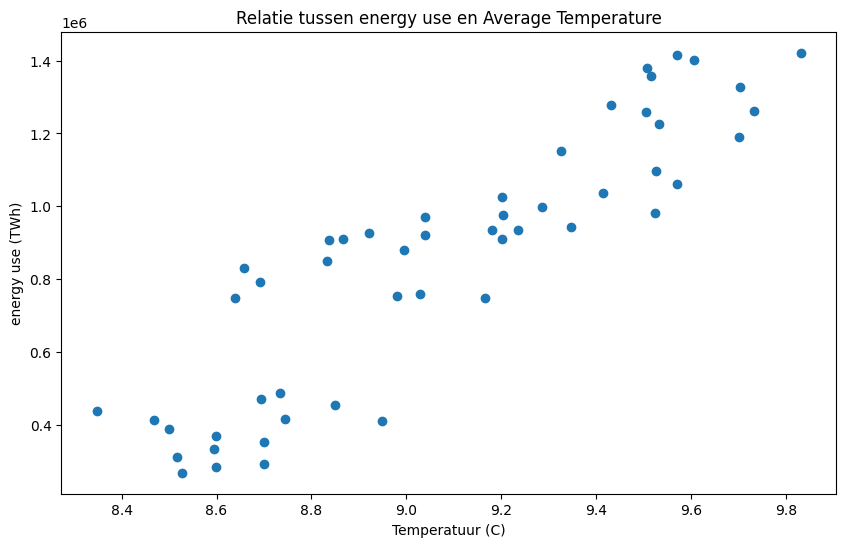

In [132]:
plt.figure(figsize=(10,6))

plt.scatter(Tempretuur_energieverbruik['LandAverageTemperature'],
            Tempretuur_energieverbruik['Primary energy consumption'])

plt.title('Relatie tussen energy use en Average Temperature')
plt.xlabel('Temperatuur (C)')
plt.ylabel('energy use (TWh)')

plt.show()

In [133]:
correlatie6 = Tempretuur_energieverbruik['LandAverageTemperature'].corr(
    Tempretuur_energieverbruik['Primary energy consumption']
)

print(correlatie6)

0.8977490434626237
